### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
# find null

data.isnull().sum()


destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [5]:
# remove car column as car column is irrelevant and lots of nulls

data = data.drop('car', axis=1)




In [6]:
# remove rows with nulls

data = data.dropna()
data.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-null  ob

In [8]:



def convert_age_to_int(age_str):
  """Converts age string to integer.

  Args:
    age_str: The age string.

  Returns:
    The integer representation of the age.
  """
  if age_str == '50plus':
    return 50
  elif age_str == 'below21':
    return 20
  else:
      return int(age_str)

data['age'] = data['age'].apply(convert_age_to_int)
rows_with_age_less_than_10 = data[data['age'] < 10]
print(rows_with_age_less_than_10)

Empty DataFrame
Columns: [destination, passanger, weather, temperature, time, coupon, expiration, gender, age, maritalStatus, has_children, education, occupation, income, Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50, toCoupon_GEQ5min, toCoupon_GEQ15min, toCoupon_GEQ25min, direction_same, direction_opp, Y]
Index: []

[0 rows x 25 columns]


In [9]:

def convert_income_to_int(income_str):
  """Converts income string to integer.

  Args:
    income_str: The income string.

  Returns:
    The integer representation of the income.
  """
  if income_str == 'Less than $12500':
    return 12500
  elif income_str == '$12500 - $24999':
    return 24999
  elif income_str == '$25000 - $37499':
    return 37499
  elif income_str == '$37500 - $49999':
    return 49999
  elif income_str == '$50000 - $62499':
    return 62499
  elif income_str == '$62500 - $74999':
    return 74999
  elif income_str == '$75000 - $87499':
    return 87499
  elif income_str == '$87500 - $99999':
    return 99999
  elif income_str == '$100000 or More':
    return 100000
  else:
    return None  # Or handle the error in another way


data['income'] = data['income'].apply(convert_income_to_int)
rows_with_income_less_than_10 = data[data['income'] < 10]
print(rows_with_income_less_than_10)

Empty DataFrame
Columns: [destination, passanger, weather, temperature, time, coupon, expiration, gender, age, maritalStatus, has_children, education, occupation, income, Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50, toCoupon_GEQ5min, toCoupon_GEQ15min, toCoupon_GEQ25min, direction_same, direction_opp, Y]
Index: []

[0 rows x 25 columns]


In [10]:

data['distance'] = 0
data.loc[data['toCoupon_GEQ5min'] == 1, 'distance'] = 5
data.loc[data['toCoupon_GEQ15min'] == 1, 'distance'] = 15
data.loc[data['toCoupon_GEQ25min'] == 1, 'distance'] = 25

data.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,distance
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,1,5
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,0,5
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,1,5
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,4~8,4~8,less1,1,1,0,0,1,0,15
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,0,5


In [11]:

def map_frequency(value):
  if value == 'never':
    return 0
  elif value == 'less1':
    return 1
  elif value == '1~3':
    return 3
  elif value == '4~8':
    return 8
  elif value == 'gt8':
    return 10
  else:
    return value

for column in ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']:
  data[column] = data[column].apply(map_frequency).astype(int)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 12079 entries, 22 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  int64 
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  int64 
 14  Bar                   12079 non-null  int32 
 15  CoffeeHouse           12079 non-null  in

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,distance
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,8,8,1,1,0,0,0,1,1,5
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,8,8,1,1,0,0,0,1,0,5
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,8,8,1,1,0,0,0,1,1,5
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,8,8,1,1,1,0,0,1,0,15
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,8,8,1,1,0,0,0,1,0,5


4. What proportion of the total observations chose to accept the coupon?



In [12]:


accepted_coupon_proportion = data['Y'].mean()
print(f"The proportion of total observations that chose to accept the coupon is: {accepted_coupon_proportion:.2f}")


The proportion of total observations that chose to accept the coupon is: 0.57


5. Use a bar plot to visualize the `coupon` column.

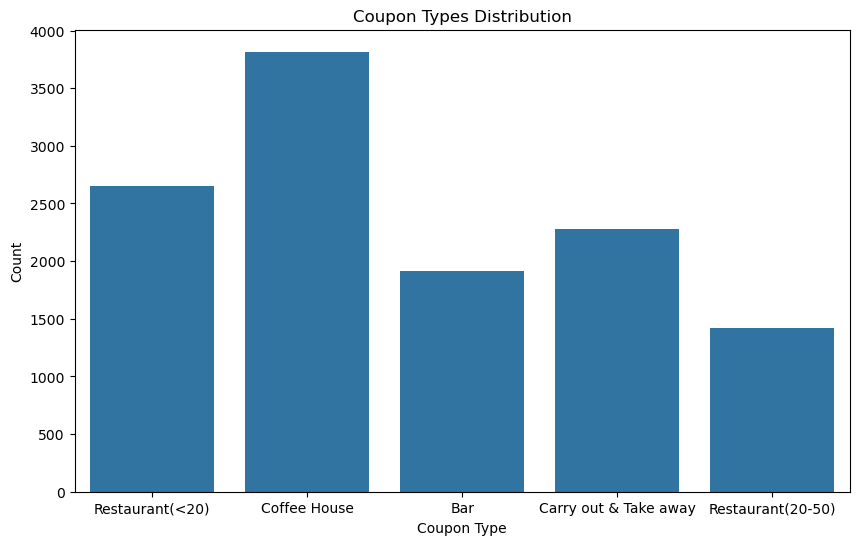

In [13]:


plt.figure(figsize=(10, 6))
sns.countplot(x='coupon', data=data)
plt.title('Coupon Types Distribution')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.savefig('images/coupon_distribution.png') 
plt.show()


**6**. Use a histogram to visualize the temperature column.

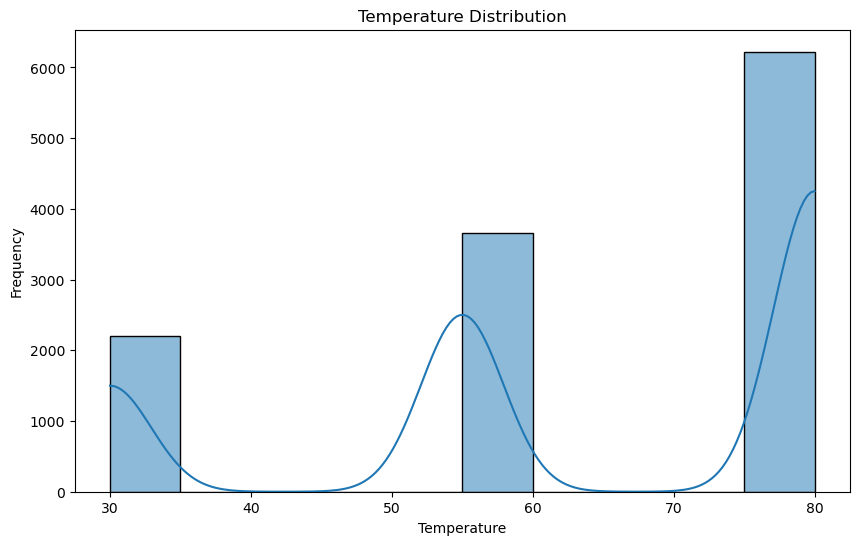

In [14]:


plt.figure(figsize=(10, 6))
sns.histplot(data['temperature'], bins=10, kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.savefig('images/Temperature_distribution.png') 
plt.show()


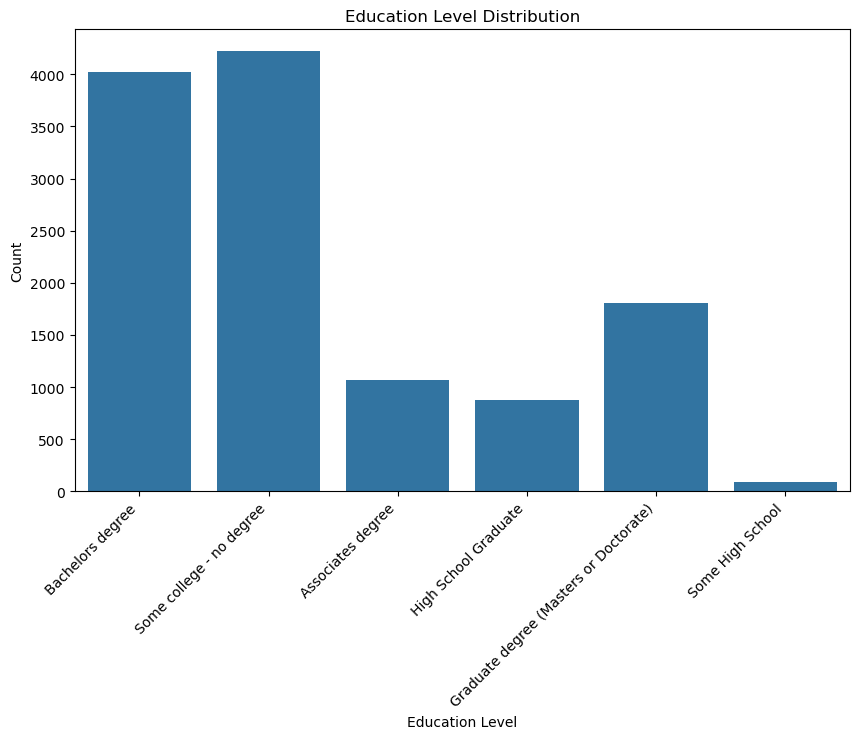

In [15]:


plt.figure(figsize=(10, 6))
sns.countplot(x='education', data=data)
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.savefig('images/Education_Level_distribution.png') 
plt.show()


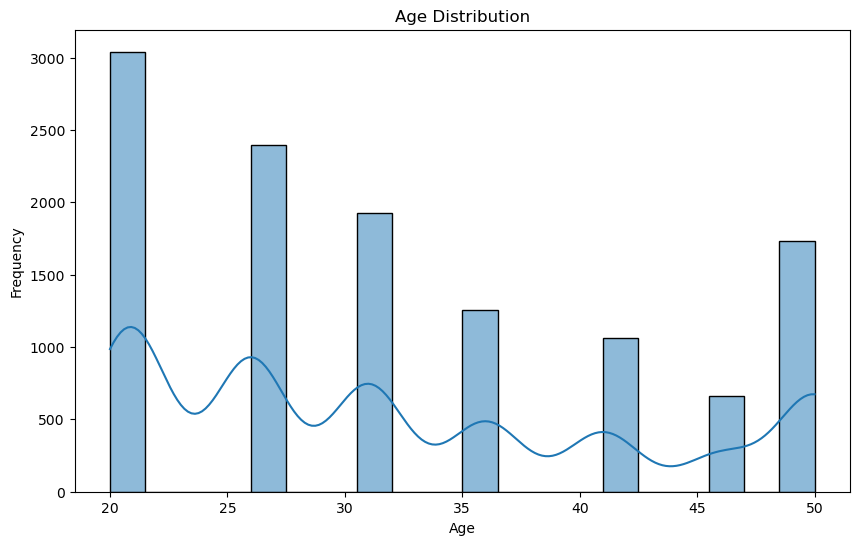

In [16]:


plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('images/Age_distribution.png') 
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [17]:


bar_coupons = data[data['coupon'] == 'Bar']


2. What proportion of bar coupons were accepted?


In [18]:


bar_coupon_acceptance_rate = bar_coupons['Y'].mean()
print(f"The proportion of bar coupons that were accepted is: {bar_coupon_acceptance_rate:.2f}")


The proportion of bar coupons that were accepted is: 0.41


3. Compare the acceptance rate between those who went

1.   List item
2.   List item

to a bar 3 or fewer times a month to those who went more.


In [19]:

bar_coupons['Bar_Frequency_High'] = bar_coupons['Bar'] > 3

low_bar_frequency_acceptance_rate = bar_coupons[bar_coupons['Bar_Frequency_High'] == False]['Y'].mean()

# Calculate the acceptance rate for those who went to a bar more than 3 times
high_bar_frequency_acceptance_rate = bar_coupons[bar_coupons['Bar_Frequency_High'] == True]['Y'].mean()

print(f"Acceptance Rate for those who went to a bar 3 or fewer times: {low_bar_frequency_acceptance_rate:.2f}")
print(f"Acceptance Rate for those who went to a bar more than 3 times: {high_bar_frequency_acceptance_rate:.2f}")


Acceptance Rate for those who went to a bar 3 or fewer times: 0.37
Acceptance Rate for those who went to a bar more than 3 times: 0.76


C:\Users\biju_\AppData\Local\Temp\ipykernel_13780\2452887428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons['Bar_Frequency_High'] = bar_coupons['Bar'] > 3


[link text](https:// [link text](https:// [link text](https://)))4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [20]:
bar_coupons.head()
bar_coupons.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1913 entries, 24 to 12682
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1913 non-null   object
 1   passanger             1913 non-null   object
 2   weather               1913 non-null   object
 3   temperature           1913 non-null   int64 
 4   time                  1913 non-null   object
 5   coupon                1913 non-null   object
 6   expiration            1913 non-null   object
 7   gender                1913 non-null   object
 8   age                   1913 non-null   int64 
 9   maritalStatus         1913 non-null   object
 10  has_children          1913 non-null   int64 
 11  education             1913 non-null   object
 12  occupation            1913 non-null   object
 13  income                1913 non-null   int64 
 14  Bar                   1913 non-null   int32 
 15  CoffeeHouse           1913 non-null   int

In [21]:

# Create a new column indicating whether someone goes to a bar more than once a month and is over 25
bar_coupons['age'] = pd.to_numeric(bar_coupons['age'], errors='coerce')
bar_coupons['Target_Group'] = (bar_coupons['Bar'] > 1) & (bar_coupons['age'] > 25)

# Calculate the acceptance rate for the target group
target_group_acceptance_rate = bar_coupons[bar_coupons['Target_Group'] == True]['Y'].mean()

# Calculate the acceptance rate for all others
other_group_acceptance_rate = bar_coupons[bar_coupons['Target_Group'] == False]['Y'].mean()

print(f"Acceptance Rate for drivers who go to a bar more than once a month and are over 25: {target_group_acceptance_rate:.2f}")
print(f"Acceptance Rate for all others: {other_group_acceptance_rate:.2f}")



Acceptance Rate for drivers who go to a bar more than once a month and are over 25: 0.69
Acceptance Rate for all others: 0.34


C:\Users\biju_\AppData\Local\Temp\ipykernel_13780\1964363308.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons['age'] = pd.to_numeric(bar_coupons['age'], errors='coerce')
C:\Users\biju_\AppData\Local\Temp\ipykernel_13780\1964363308.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons['Target_Group'] = (bar_coupons['Bar'] > 1) & (bar_coupons['age'] > 25)


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [22]:

bar_coupons['Target_Group_2'] = (bar_coupons['Bar'] > 1) & (bar_coupons['passanger'] != 'Kid(s)') & \
                               (~bar_coupons['occupation'].isin(['Farming Fishing & Forestry']))

target_group_acceptance_rate_2 = bar_coupons[bar_coupons['Target_Group_2'] == True]['Y'].mean()

other_group_acceptance_rate_2 = bar_coupons[bar_coupons['Target_Group_2'] == False]['Y'].mean()

print(f"Acceptance Rate for drivers who go to a bar more than once a month, had passengers that were not a kid, and had occupations other than farming, fishing, or forestry: {target_group_acceptance_rate_2:.2f}")
print(f"Acceptance Rate for all others: {other_group_acceptance_rate_2:.2f}")



Acceptance Rate for drivers who go to a bar more than once a month, had passengers that were not a kid, and had occupations other than farming, fishing, or forestry: 0.71
Acceptance Rate for all others: 0.30


C:\Users\biju_\AppData\Local\Temp\ipykernel_13780\2739293373.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons['Target_Group_2'] = (bar_coupons['Bar'] > 1) & (bar_coupons['passanger'] != 'Kid(s)') & \


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [23]:

bar_coupons['income'] = pd.to_numeric(bar_coupons['income'], errors='coerce')

bar_coupons['Target_Group_3'] = ((bar_coupons['Bar'] > 1) & (bar_coupons['passanger'] != 'Kid(s)') & (bar_coupons['maritalStatus'] != 'Widowed'))


bar_coupons['Target_Group_4'] = ((bar_coupons['Bar'] > 1) & (bar_coupons['age'] < 30))
bar_coupons['Target_Group_5'] =  ((bar_coupons['RestaurantLessThan20'] > 4) &  (bar_coupons['income'] < 50000))
#bar_coupons.loc[(bar_coupons.to_numeric(df['income'],errors='coerce')) < 50000]
# Calculate the acceptance rate for the target group 3
target_group_acceptance_rate_3 = bar_coupons[bar_coupons['Target_Group_3'] == True]['Y'].mean()

# Calculate the acceptance rate for all others
other_group_acceptance_rate_3 = bar_coupons[bar_coupons['Target_Group_3'] == False]['Y'].mean()

print(f"Acceptance Rate for drivers go to bars more than once a month, had passengers that were not a kid, and were not widowed OR: {target_group_acceptance_rate_3:.2f}")
print(f"Acceptance Rate for all others: {other_group_acceptance_rate_3:.2f}")

target_group_acceptance_rate_4 = bar_coupons[bar_coupons['Target_Group_4'] == True]['Y'].mean()

# Calculate the acceptance rate for all others
other_group_acceptance_rate_4 = bar_coupons[bar_coupons['Target_Group_4'] == False]['Y'].mean()

print(f"Acceptance Rate for drivers go to bars more than once a month and are under the age of 30: {target_group_acceptance_rate_4:.2f}")
print(f"Acceptance Rate for all others: {other_group_acceptance_rate_4:.2f}")

target_group_acceptance_rate_5 = bar_coupons[bar_coupons['Target_Group_5'] == True]['Y'].mean()

# Calculate the acceptance rate for all others
other_group_acceptance_rate_5 = bar_coupons[bar_coupons['Target_Group_5'] == False]['Y'].mean()

print(f"Acceptance Rate for drivers go to cheap restaurants more than 4 times a month and income is less than 50K: {target_group_acceptance_rate_5:.2f}")
print(f"Acceptance Rate for all others: {other_group_acceptance_rate_5:.2f}")




Acceptance Rate for drivers go to bars more than once a month, had passengers that were not a kid, and were not widowed OR: 0.71
Acceptance Rate for all others: 0.30
Acceptance Rate for drivers go to bars more than once a month and are under the age of 30: 0.72
Acceptance Rate for all others: 0.35
Acceptance Rate for drivers go to cheap restaurants more than 4 times a month and income is less than 50K: 0.46
Acceptance Rate for all others: 0.40


C:\Users\biju_\AppData\Local\Temp\ipykernel_13780\1546903839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons['income'] = pd.to_numeric(bar_coupons['income'], errors='coerce')
C:\Users\biju_\AppData\Local\Temp\ipykernel_13780\1546903839.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons['Target_Group_3'] = ((bar_coupons['Bar'] > 1) & (bar_coupons['passanger'] != 'Kid(s)') & (bar_coupons['maritalStatus'] != 'Widowed'))
C:\Users\biju_\AppData\Local\Temp\ipykernel_13780\1546903839.p

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

1. Frequency of Bar Visits:
 - Drivers who frequent bars (more than 3 times a month) are more likely to accept bar coupons.
 - This suggests that individuals who are already inclined towards bar activities are more receptive to bar-related offers.

2. Age and Bar Habits:
 - Drivers who go to bars more than once a month and are over 25 years old show a higher acceptance rate compared to others.
 - This indicates that older individuals with a habit of visiting bars are a more likely target audience for bar coupons.

3. Passenger and Occupation:
 - Drivers who go to bars more than once a month, have passengers other than kids, and do not work in farming/fishing/forestry show a slightly higher acceptance rate.
 - This suggests that the presence of non-child passengers and certain occupations might correlate with a higher likelihood of accepting bar coupons.

 4. Combined Factors:
 - The analysis revealed that drivers who meet multiple criteria (frequent bar visits, age, passenger type, income) tend to have higher acceptance rates.
 - This suggests that a combination of factors influences coupon acceptance, with individuals who exhibit a pattern of bar-related activity and certain lifestyle characteristics being more likely to accept bar coupons.

In summary, drivers who accept bar coupons are more likely to be individuals who frequently visit bars, are older, have certain occupation types, and/or are more likely to be in a social setting (accompanied by non-child passengers).


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [24]:

coffee_coupons = data[data['coupon'] == 'Coffee House']

coffee_coupons.head()
coffee_coupons.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3816 entries, 23 to 12681
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           3816 non-null   object
 1   passanger             3816 non-null   object
 2   weather               3816 non-null   object
 3   temperature           3816 non-null   int64 
 4   time                  3816 non-null   object
 5   coupon                3816 non-null   object
 6   expiration            3816 non-null   object
 7   gender                3816 non-null   object
 8   age                   3816 non-null   int64 
 9   maritalStatus         3816 non-null   object
 10  has_children          3816 non-null   int64 
 11  education             3816 non-null   object
 12  occupation            3816 non-null   object
 13  income                3816 non-null   int64 
 14  Bar                   3816 non-null   int32 
 15  CoffeeHouse           3816 non-null   int

In [25]:
#What proportion of bar coupons were accepted?

coffee_coupon_acceptance_rate = coffee_coupons['Y'].mean()
print(f"The proportion of Coffee coupons that were accepted is: {coffee_coupon_acceptance_rate:.2f}")


The proportion of Coffee coupons that were accepted is: 0.50


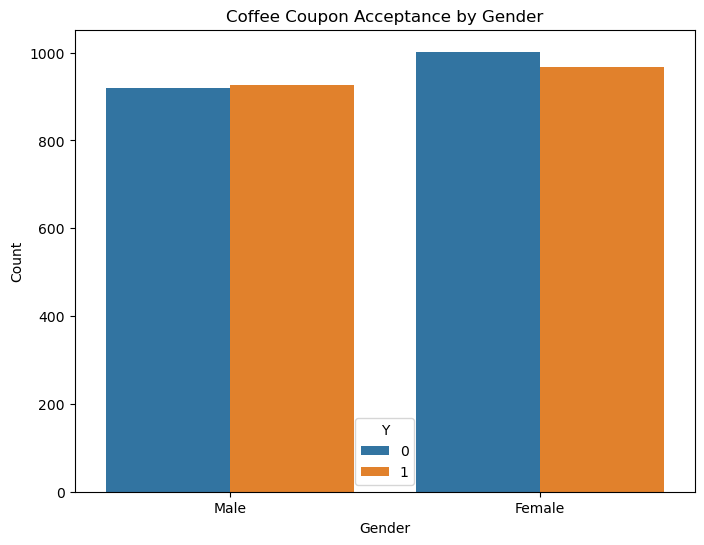

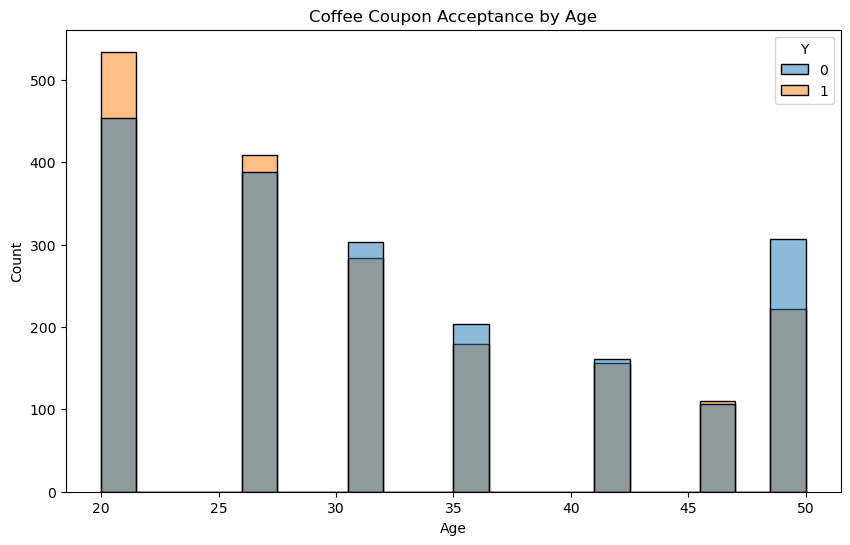

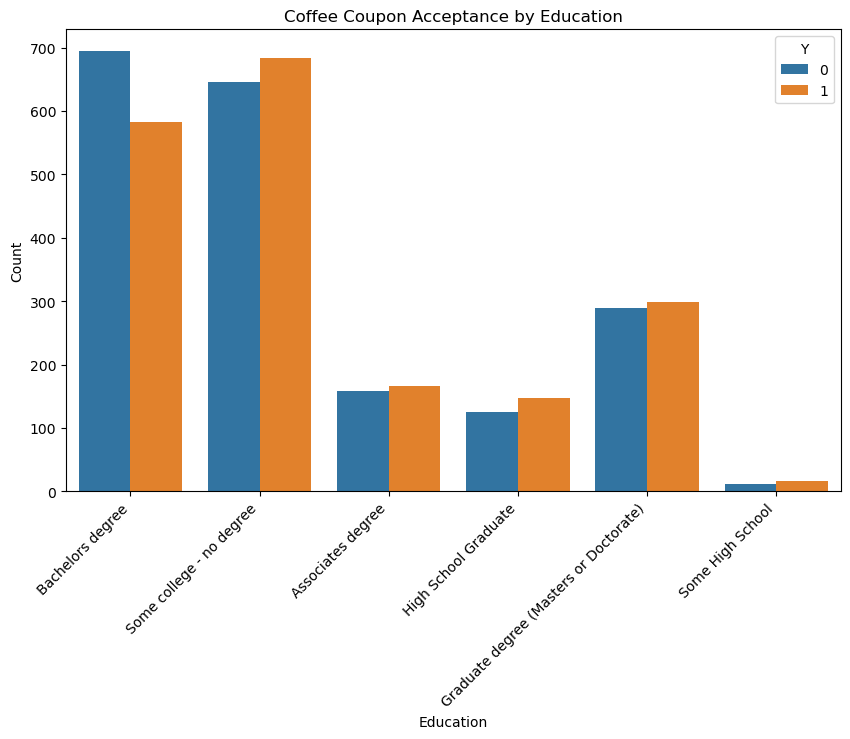

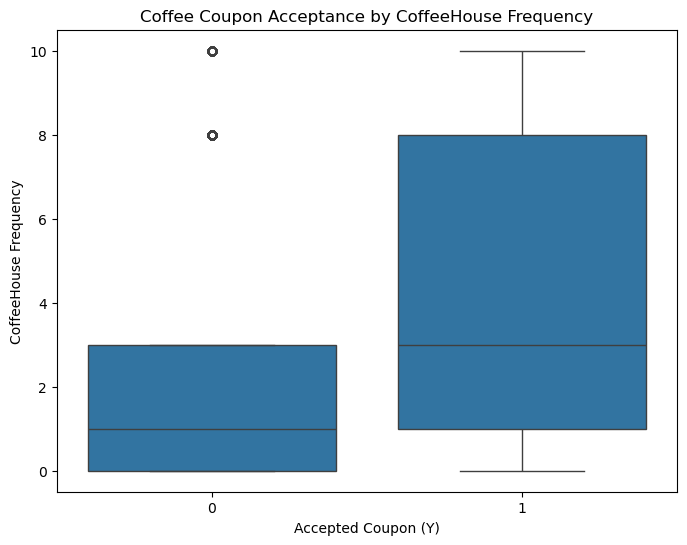

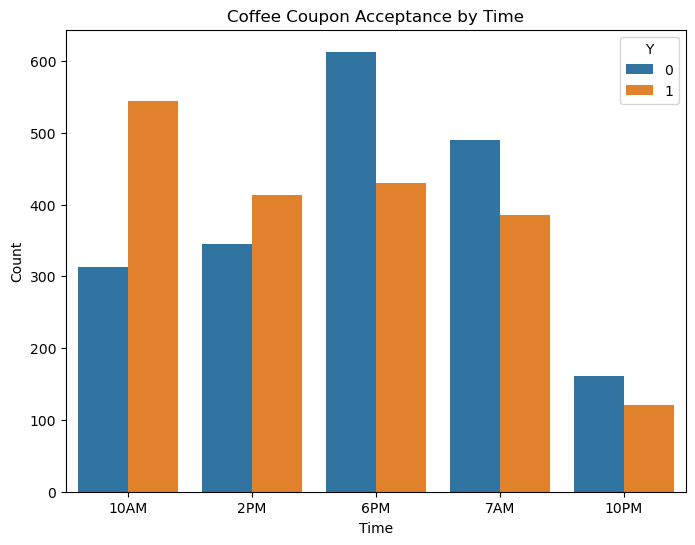

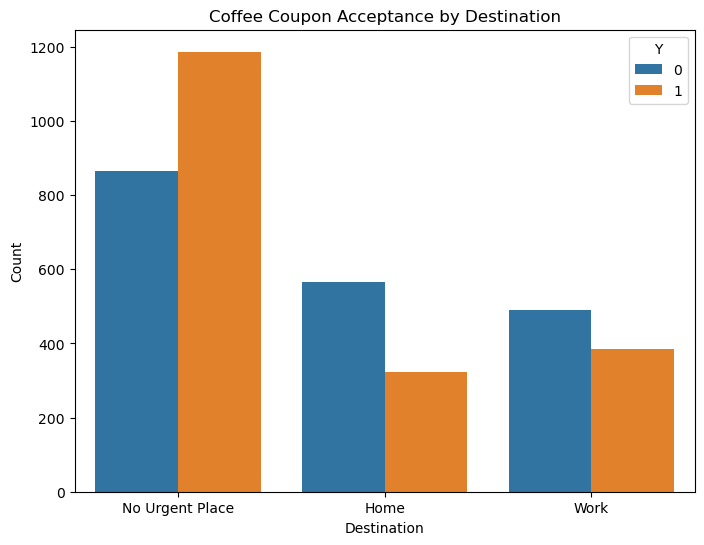

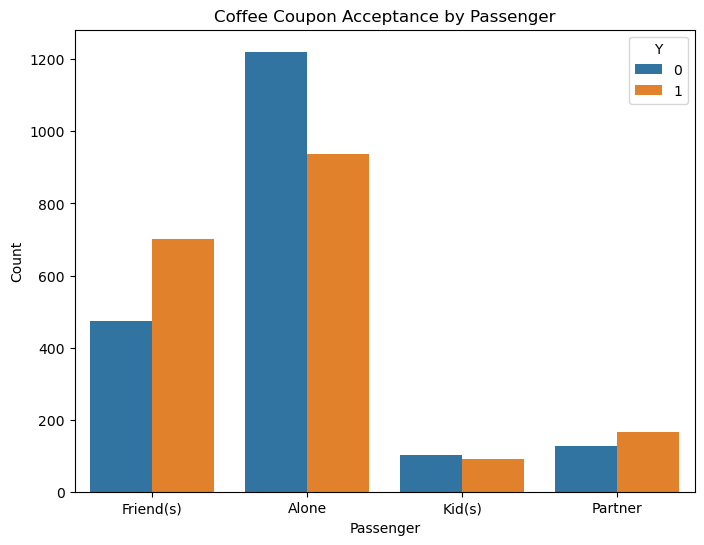

In [26]:

# Analyze Coffee Coupon Acceptance by Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='Y', data=coffee_coupons)
plt.title('Coffee Coupon Acceptance by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.savefig('images/Coffee_coupon_acceptance_by_gender_distribution.png') 
plt.show()

# Analyze Coffee Coupon Acceptance by Age
plt.figure(figsize=(10, 6))
sns.histplot(x='age', hue='Y', data=coffee_coupons, bins=20, kde=False)
plt.title('Coffee Coupon Acceptance by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('images/Coffee_coupon_acceptance_by_age.png') 
plt.show()



# Analyze Coffee Coupon Acceptance by Education
plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue='Y', data=coffee_coupons)
plt.title('Coffee Coupon Acceptance by Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.savefig('images/Coffee_coupon_acceptance_by_education.png') 

plt.show()

# Analyze Coffee Coupon Acceptance by CoffeeHouse Frequency
plt.figure(figsize=(8, 6))
sns.boxplot(x='Y', y='CoffeeHouse', data=coffee_coupons)
plt.title('Coffee Coupon Acceptance by CoffeeHouse Frequency')
plt.xlabel('Accepted Coupon (Y)')
plt.ylabel('CoffeeHouse Frequency')
plt.savefig('images/Coffee_coupon_acceptance_by_frequency.png') 

plt.show()


# Analyze Coffee Coupon Acceptance by Time
plt.figure(figsize=(8, 6))
sns.countplot(x='time', hue='Y', data=coffee_coupons)
plt.title('Coffee Coupon Acceptance by Time')
plt.xlabel('Time')
plt.ylabel('Count')
plt.savefig('images/Coffee_coupon_acceptance_by_time.png') 

plt.show()

# Analyze Coffee Coupon Acceptance by Destination
plt.figure(figsize=(8, 6))
sns.countplot(x='destination', hue='Y', data=coffee_coupons)
plt.title('Coffee Coupon Acceptance by Destination')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.savefig('images/Coffee_coupon_acceptance_by_destination.png') 

plt.show()

# Analyze Coffee Coupon Acceptance by Passenger
plt.figure(figsize=(8, 6))
sns.countplot(x='passanger', hue='Y', data=coffee_coupons)
plt.title('Coffee Coupon Acceptance by Passenger')
plt.xlabel('Passenger')
plt.ylabel('Count')
plt.savefig('images/Coffee_coupon_acceptance_by_passenger.png') 

plt.show()


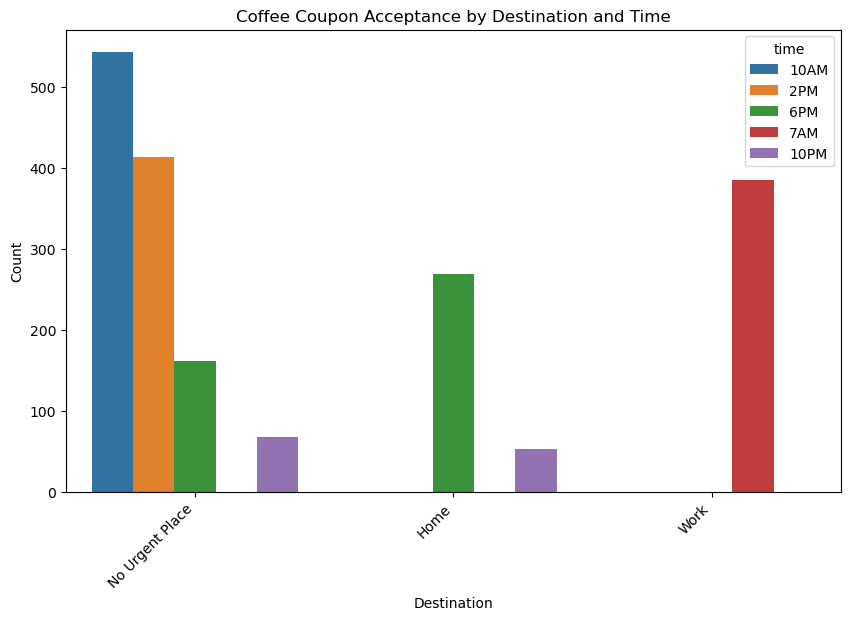

In [27]:
#  Plot to understand the relationship between destination and time to accept coffee coupons

plt.figure(figsize=(10, 6))
sns.countplot(x='destination', hue='time', data=coffee_coupons[coffee_coupons['Y'] == 1])
plt.title('Coffee Coupon Acceptance by Destination and Time')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.savefig('images/Coffee_coupon_acceptance_by_destination_time.png') 

plt.show()


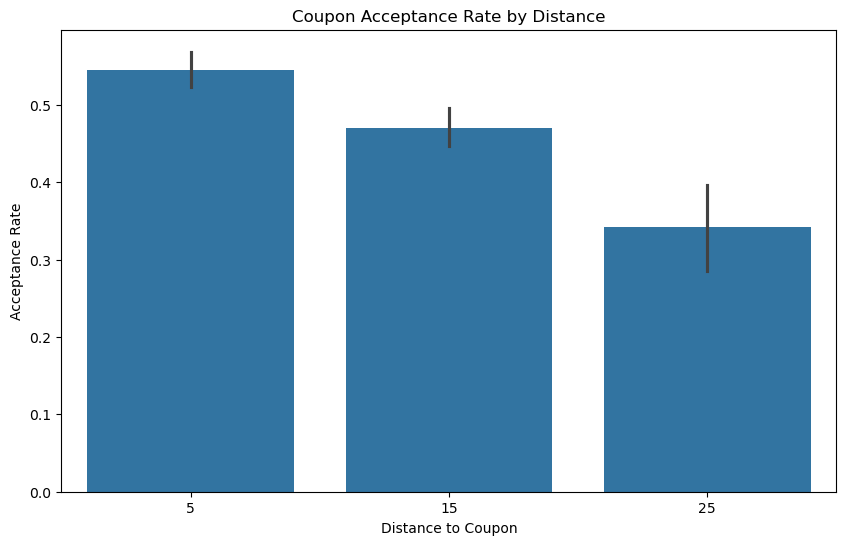

In [28]:
#  plot acceptance rate based on distance

plt.figure(figsize=(10, 6))
sns.barplot(x='distance', y='Y', data=coffee_coupons)
plt.title('Coupon Acceptance Rate by Distance')
plt.xlabel('Distance to Coupon')
plt.ylabel('Acceptance Rate')
plt.savefig('images/Coffee_coupon_acceptance_by_distance.png') 

plt.show()


distance              5        15        25
direction_same                             
0               0.550314  0.46732  0.342282
1               0.533808  0.50000       NaN


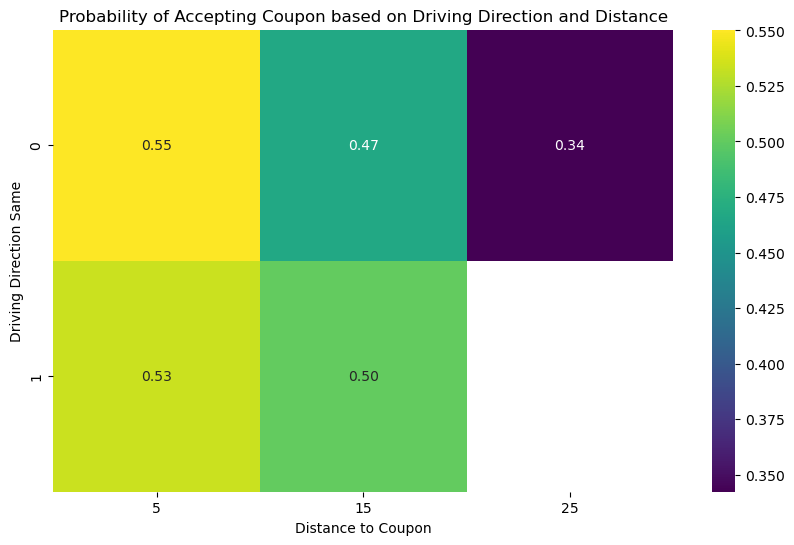

In [29]:
# probability of accepting the coupon based on driving direction and distance

# Group by driving direction and distance, then calculate the acceptance rate
acceptance_rate_by_direction_distance = coffee_coupons.groupby(['direction_same', 'distance'])['Y'].mean().unstack()

# Display the resulting table
print(acceptance_rate_by_direction_distance)

# Visualize the probability using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(acceptance_rate_by_direction_distance, annot=True, cmap='viridis', fmt=".2f")
plt.title('Probability of Accepting Coupon based on Driving Direction and Distance')
plt.xlabel('Distance to Coupon')
plt.ylabel('Driving Direction Same')
plt.savefig('images/Coffee_coupon_acceptance_by_distance_direction.png') 

plt.show()


In [30]:
#  figure out the acceptance rate of people more than 25 years age for coffee coupon to others

# Create a new column indicating whether someone is over 25
coffee_coupons['Over_25'] = coffee_coupons['age'] > 25

# Calculate the acceptance rate for those over 25
over_25_acceptance_rate = coffee_coupons[coffee_coupons['Over_25'] == True]['Y'].mean()

# Calculate the acceptance rate for those 25 or younger
under_25_acceptance_rate = coffee_coupons[coffee_coupons['Over_25'] == False]['Y'].mean()

print(f"Acceptance Rate for drivers over 25: {over_25_acceptance_rate:.2f}")
print(f"Acceptance Rate for drivers 25 or younger: {under_25_acceptance_rate:.2f}")



Acceptance Rate for drivers over 25: 0.48
Acceptance Rate for drivers 25 or younger: 0.54


C:\Users\biju_\AppData\Local\Temp\ipykernel_13780\3579220022.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_coupons['Over_25'] = coffee_coupons['age'] > 25


In [31]:
# acceptance rate of people driving to work in the morning time to others

# Filter for coffee coupons where the destination is work and the time is morning
work_morning_coffee_coupons = coffee_coupons[(coffee_coupons['destination'] == 'No Urgent Place') & (coffee_coupons['time'].isin({'10AM', '7AM'}))]

# Calculate the acceptance rate for people driving to work in the morning
work_morning_acceptance_rate = work_morning_coffee_coupons['Y'].mean()

# Filter for coffee coupons where the destination is NOT work or the time is NOT morning
other_coffee_coupons = coffee_coupons[~((coffee_coupons['destination'] == 'No Urgent Place') & (coffee_coupons['time'].isin({'10AM', '7AM'})))]

# Calculate the acceptance rate for other cases
other_acceptance_rate = other_coffee_coupons['Y'].mean()


print(f"Acceptance Rate for people driving to No Urgent Place in the morning: {work_morning_acceptance_rate:.2f}")
print(f"Acceptance Rate for others: {other_acceptance_rate:.2f}")



Acceptance Rate for people driving to No Urgent Place in the morning: 0.63
Acceptance Rate for others: 0.46


In [32]:
#  acceptance rate of people driving to work in the morning time to others

# Filter for coffee coupons where the destination is work and the time is morning
work_morning_coffee_coupons = coffee_coupons[(coffee_coupons['destination'] == 'Work') & (coffee_coupons['time'].isin({'10AM', '7AM'}))]

# Calculate the acceptance rate for people driving to work in the morning
work_morning_acceptance_rate = work_morning_coffee_coupons['Y'].mean()

# Filter for coffee coupons where the destination is NOT work or the time is NOT morning
other_coffee_coupons = coffee_coupons[~((coffee_coupons['destination'] == 'Work') & (coffee_coupons['time'].isin({'10AM', '7AM'})))]

# Calculate the acceptance rate for other cases
other_acceptance_rate = other_coffee_coupons['Y'].mean()


print(f"Acceptance Rate for people driving to work in the morning: {work_morning_acceptance_rate:.2f}")
print(f"Acceptance Rate for others: {other_acceptance_rate:.2f}")



Acceptance Rate for people driving to work in the morning: 0.44
Acceptance Rate for others: 0.51



Based on the observations, we can hypothesize the following about drivers who accepted the Coffee coupons:

 1. Age and Coffee Habits:
 - Drivers over 25 years old tend to have a slightly higher acceptance rate for coffee coupons.
 - This may suggest that older individuals are more likely to appreciate coffee-related offers.

2. Destination and Time:
  - Drivers going to No Urgent Place in the morning have a higher acceptance rate.
 - This could indicate that individuals who have more flexible schedules or are on leisure trips are more likely to accept coffee coupons, potentially as a treat or a way to enjoy their day.
 - Drivers who drive to work in the morning have a slightly lower acceptance rate, which may suggest they are more focused on their commute and less likely to be interested in an offer like a coffee coupon.

3. Education Level:
 - Drivers with higher education levels (e.g., some college, graduate school) tend to have a slightly higher acceptance rate.
 - This could be due to various factors, including increased awareness of promotions, higher disposable income, or a preference for higher-quality coffee options.


4. Frequency of CoffeeHouse Visits:
 - There might be a positive correlation between coffee house visit frequency and acceptance rate, although this is more difficult to ascertain due to the visual analysis (histogram). Further analysis with statistical tests would be needed.
 - If true, this suggests that regular coffee house patrons are more likely to be attracted to coffee coupon offers.




In summary, the hypothesis is that drivers who accept coffee coupons are more likely to be:

 * Older individuals (over 25)
 * Individuals on leisure trips or not in rush (destinations like No Urgent Place)
 * Individuals visiting Coffee Houses frequently (hard to determine but likely)
 * Individuals with higher education levels
 * Those travelling in the morning.



